# Inventory of short online analysis runs
VR Feb 2025

In [13]:
import glob
import visionloader as vl
import os
import pandas as pd

In [14]:
str_glob = '/Volumes/data-1/analysis/*/data*'
ls_dirs = glob.glob(str_glob)
print(f'Found {len(ls_dirs)} directories, eg-{ls_dirs[0]}')

Found 42 directories, eg-/Volumes/data-1/analysis/20230511C/data002


In [15]:
str_glob2 = '/Volumes/data-1/analysis/*/online*'
ls_dirs += glob.glob(str_glob2)
print(f'Found {len(ls_dirs)} directories, eg-{ls_dirs[0]}')

ls_dirs = sorted(ls_dirs)

Found 43 directories, eg-/Volumes/data-1/analysis/20230511C/data002


In [16]:
def get_max_st_min(str_dir, b_verbose=False):
    analysis_path = str_dir
    # dataset_name = os.path.basename(str_dir)
    dataset_file = glob.glob(os.path.join(analysis_path, '*.neurons'))[0]
    dataset_name = os.path.basename(dataset_file)[:-8]
    if b_verbose:
        print(f'Using {analysis_path} as analysis path')
        print(f'Using {dataset_name} as dataset name')
    vcd = vl.load_vision_data(analysis_path, dataset_name, include_neurons=True)
    sample_rate = 20000.0 # Hz
    ids = vcd.get_cell_ids()

    # Find max spike time across all cells
    max_spike_time = 0
    for cell_id in ids:
        sts = vcd.get_spike_times_for_cell(cell_id)
        if sts.max() > max_spike_time:
            max_spike_time = sts.max()
    
    max_spike_min = (max_spike_time/sample_rate)/60.0
    
    if b_verbose:
        print(f'Max spike time is {max_spike_time/sample_rate:.2f} seconds')
        print(f'Max spike time is {max_spike_min:.2f} minutes')
    return max_spike_min

str_eg_dir = '/Volumes/data-1/analysis/20250131C/chunk1/kilosort2.5'
print(f'Using {str_eg_dir} as example directory')
max_spike_min = get_max_st_min(str_eg_dir, b_verbose=True)

Using /Volumes/data-1/analysis/20250131C/chunk1/kilosort2.5 as example directory
Using /Volumes/data-1/analysis/20250131C/chunk1/kilosort2.5 as analysis path
Using kilosort2.5 as dataset name
Max spike time is 3792.80 seconds
Max spike time is 63.21 minutes


In [17]:
ls_dirs[0].split('/')

['', 'Volumes', 'data-1', 'analysis', '20230511C', 'data002']

In [18]:
import tqdm
d_max_sts = {'dir': [], 'max_st_min': [], 'date_id': [], 'datafile': []}
for str_dir in tqdm.tqdm(ls_dirs):
    str_date = str_dir.split('/')[-2]
    str_datafile = str_dir.split('/')[-1]
    try:
        max_spike_min = get_max_st_min(str_dir)
    except Exception as e:
        print(f'Error with {str_dir}: {e}')
        str_try = glob.glob(str_dir + '/kilo*')[0]
        print('Trying subdir ', str_try)
        max_spike_min = get_max_st_min(str_try)
    d_max_sts['dir'].append(str_dir)
    d_max_sts['max_st_min'].append(max_spike_min)
    d_max_sts['date_id'].append(str_date)
    d_max_sts['datafile'].append(str_datafile)

  0%|          | 0/43 [00:00<?, ?it/s]

Error with /Volumes/data-1/analysis/20230511C/data002: list index out of range
Trying subdir  /Volumes/data-1/analysis/20230511C/data002/kilosort2


 49%|████▉     | 21/43 [02:00<02:33,  6.97s/it]

Error with /Volumes/data-1/analysis/20240117C/data001: list index out of range
Trying subdir  /Volumes/data-1/analysis/20240117C/data001/kilosort2


 91%|█████████ | 39/43 [02:48<00:03,  1.05it/s]

Error with /Volumes/data-1/analysis/20240926C/data007: list index out of range
Trying subdir  /Volumes/data-1/analysis/20240926C/data007/kilosort2.5


100%|██████████| 43/43 [02:58<00:00,  4.14s/it]


In [19]:
df_max_sts = pd.DataFrame(d_max_sts)
df_max_sts.head()

,dir,max_st_min,date_id,datafile
0,/Volumes/data-1/analysis/20230511C/data002,49.432083,20230511C,data002
1,/Volumes/data-1/analysis/20230516C/data009,30.916676,20230516C,data009
2,/Volumes/data-1/analysis/20230517C/data000,30.849977,20230517C,data000
3,/Volumes/data-1/analysis/20230523C/data000,43.283321,20230523C,data000
4,/Volumes/data-1/analysis/20230530C/data000,49.466664,20230530C,data000


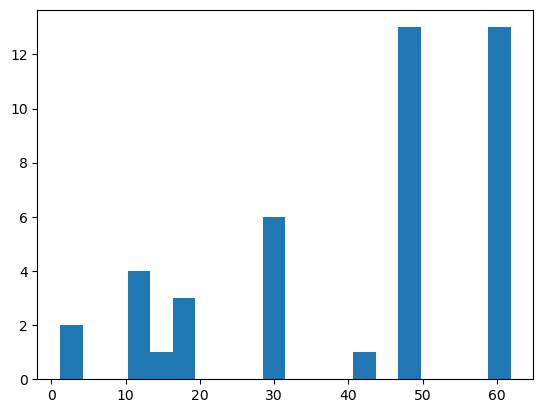

In [20]:
import matplotlib.pyplot as plt
plt.hist(df_max_sts['max_st_min'], bins=20);

In [21]:
df = df_max_sts[(df_max_sts['max_st_min'] < 20) & (df_max_sts['max_st_min'] > 10)]

df = df.reset_index()
# df[['date_id', 'datafile']]
df

,index,dir,max_st_min,date_id,datafile
0,29,/Volumes/data-1/analysis/20240717C/data000,15.699998,20240717C,data000
1,30,/Volumes/data-1/analysis/20240718C/data000,12.566610,20240718C,data000
2,31,/Volumes/data-1/analysis/20240801C/data001,12.499934,20240801C,data001
3,33,/Volumes/data-1/analysis/20240806C/data011,18.699998,20240806C,data011
4,35,/Volumes/data-1/analysis/20240813C/data007,17.999993,20240813C,data007
5,36,/Volumes/data-1/analysis/20240813C/data008,18.699898,20240813C,data008
6,41,/Volumes/data-1/analysis/20250121C/data002,12.566507,20250121C,data002
7,42,/Volumes/data-1/analysis/20250131C/data001,12.466656,20250131C,data001


Want to get associated full noise chunk for each of those, compare number of cells, map EIs and plot matches found 

In [26]:
import datajoint as dj
import sys
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/datajoint/dj_modules/')
import dj_metadata as djm
import dj_populate as djp

dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

In [24]:
djm.load_metadata(str_metadata_dir='/Volumes/data-1/data/metadata/json/')

20250128C
20250131C
Added 2 new experiments


In [27]:
djp.load_chunks_and_files()

20230825C not in Experiment table.
20230825C not in Experiment table.
20230825C not in Experiment table.
20240606H not in Experiment table.
20240611H not in Experiment table.
20240611H not in Experiment table.
20240627H not in Experiment table.
20240627H not in Experiment table.
20240717H not in Experiment table.
20240717H not in Experiment table.
20240717H not in Experiment table.
20241121H not in Experiment table.
20241121H not in Experiment table.
20241121H not in Experiment table.
Added 11 new data files


In [28]:
djm.Experiment().fetch(format='frame').tail()

,animal_id
date_id,
20241016C,
20241121C,
20250121C,
20250128C,
20250131C,


In [29]:
df.head()

,index,dir,max_st_min,date_id,datafile
0,29,/Volumes/data-1/analysis/20240717C/data000,15.699998,20240717C,data000
1,30,/Volumes/data-1/analysis/20240718C/data000,12.566610,20240718C,data000
2,31,/Volumes/data-1/analysis/20240801C/data001,12.499934,20240801C,data001
3,33,/Volumes/data-1/analysis/20240806C/data011,18.699998,20240806C,data011
4,35,/Volumes/data-1/analysis/20240813C/data007,17.999993,20240813C,data007


In [41]:
djm.SortingChunk() & 'date_id="20240718C"'

date_id date id of experiment,chunk_id


In [39]:
date_id, datafile

('20240718C', 'data000')

In [42]:
# Get associated chunk noise run for each datafile in df
df['chunk'] = None
df['online_ei_path'] = None
df['chunk_ei_path'] = None

for idx in range(len(df)):
    date_id = df['date_id'][idx]
    datafile = df['datafile'][idx]

    try:
        query = djm.DataFile() & f'date_id="{date_id}"' & f'data_file="{datafile}"'
        chunk_id = query.fetch1('chunk_id')
    except:
        print(f'No chunk found for {date_id}/{datafile}')
        continue
    df.at[idx, 'chunk'] = chunk_id

    # Get online EI path
    ei_path = glob.glob(os.path.join(df['dir'][idx], '*.ei'))
    if len(ei_path) == 0:
        ei_path = glob.glob(os.path.join(df['dir'][idx], '*', 'online*.ei'))

    if len(ei_path) == 0:
        print(f'No EI file found for {df["dir"][idx]}')
    else:
        df.at[idx, 'online_ei_path'] = ei_path[0]

    # Get chunk EI path
    data_dir = os.path.dirname(df['dir'][idx])
    ei_path = glob.glob(os.path.join(data_dir, chunk_id, '*', '*.ei'))
    if len(ei_path) == 0:
        print(f'No EI file found for {data_dir}/{chunk_id}')
    else:
        df.at[idx, 'chunk_ei_path'] = ei_path[0]

No chunk found for 20240718C/data000


In [44]:
# Remove None EI paths
df = df.dropna(subset=['online_ei_path', 'chunk_ei_path'])
df

,index,dir,max_st_min,date_id,datafile,chunk,chunk_ei_path,online_ei_path
0,29,/Volumes/data-1/analysis/20240717C/data000,15.699998,20240717C,data000,chunk1,/Volumes/data-1/analysis/20240717C/chunk1/kilo...,/Volumes/data-1/analysis/20240717C/data000/dat...
2,31,/Volumes/data-1/analysis/20240801C/data001,12.499934,20240801C,data001,chunk1,/Volumes/data-1/analysis/20240801C/chunk1/kilo...,/Volumes/data-1/analysis/20240801C/data001/dat...
3,33,/Volumes/data-1/analysis/20240806C/data011,18.699998,20240806C,data011,chunk3,/Volumes/data-1/analysis/20240806C/chunk3/kilo...,/Volumes/data-1/analysis/20240806C/data011/dat...
4,35,/Volumes/data-1/analysis/20240813C/data007,17.999993,20240813C,data007,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data007/dat...
5,36,/Volumes/data-1/analysis/20240813C/data008,18.699898,20240813C,data008,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data008/dat...
6,41,/Volumes/data-1/analysis/20250121C/data002,12.566507,20250121C,data002,chunk1,/Volumes/data-1/analysis/20250121C/chunk1/kilo...,/Volumes/data-1/analysis/20250121C/data002/dat...
7,42,/Volumes/data-1/analysis/20250131C/data001,12.466656,20250131C,data001,chunk1,/Volumes/data-1/analysis/20250131C/chunk1/kilo...,/Volumes/data-1/analysis/20250131C/data001/dat...


In [50]:
# Populate num cells
df['n_cells_online'] = None
df['n_cells_chunk'] = None

/var/folders/pt/ln41qs8d7vd36z1sgbgljbn00000gn/T/ipykernel_69063/937264681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_cells_online'] = None
/var/folders/pt/ln41qs8d7vd36z1sgbgljbn00000gn/T/ipykernel_69063/937264681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_cells_chunk'] = None


In [57]:
df = df.reset_index()
# Remove level_0 and index columns
df = df.drop(columns=['level_0', 'index'])
df

,dir,max_st_min,date_id,datafile,chunk,chunk_ei_path,online_ei_path,n_cells_online,n_cells_chunk
0,/Volumes/data-1/analysis/20240717C/data000,15.699998,20240717C,data000,chunk1,/Volumes/data-1/analysis/20240717C/chunk1/kilo...,/Volumes/data-1/analysis/20240717C/data000/dat...,795,557
1,/Volumes/data-1/analysis/20240801C/data001,12.499934,20240801C,data001,chunk1,/Volumes/data-1/analysis/20240801C/chunk1/kilo...,/Volumes/data-1/analysis/20240801C/data001/dat...,None,None
2,/Volumes/data-1/analysis/20240806C/data011,18.699998,20240806C,data011,chunk3,/Volumes/data-1/analysis/20240806C/chunk3/kilo...,/Volumes/data-1/analysis/20240806C/data011/dat...,None,None
3,/Volumes/data-1/analysis/20240813C/data007,17.999993,20240813C,data007,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data007/dat...,None,None
4,/Volumes/data-1/analysis/20240813C/data008,18.699898,20240813C,data008,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data008/dat...,None,None
5,/Volumes/data-1/analysis/20250121C/data002,12.566507,20250121C,data002,chunk1,/Volumes/data-1/analysis/20250121C/chunk1/kilo...,/Volumes/data-1/analysis/20250121C/data002/dat...,None,None
6,/Volumes/data-1/analysis/20250131C/data001,12.466656,20250131C,data001,chunk1,/Volumes/data-1/analysis/20250131C/chunk1/kilo...,/Volumes/data-1/analysis/20250131C/data001/dat...,None,None


In [58]:
for idx in range(len(df)):
# idx = 0
    for str_data in ['chunk', 'online']:
# str_data = 'online'
        dir = os.path.dirname(df.loc[idx, f'{str_data}_ei_path'])
        dataset_name = os.path.basename(df.loc[idx, f'{str_data}_ei_path'])[:-3]
        vcd = vl.load_vision_data(dir, dataset_name, include_neurons=True)
        n_cells = len(vcd.get_cell_ids())
        df.loc[idx, f'n_cells_{str_data}'] = n_cells

In [63]:
df['dataset'] = df['date_id'] + '_' + df['chunk'] + '_' + df['datafile']

In [61]:
import seaborn as sns

In [64]:
df

,dir,max_st_min,date_id,datafile,chunk,chunk_ei_path,online_ei_path,n_cells_online,n_cells_chunk,dataset
0,/Volumes/data-1/analysis/20240717C/data000,15.699998,20240717C,data000,chunk1,/Volumes/data-1/analysis/20240717C/chunk1/kilo...,/Volumes/data-1/analysis/20240717C/data000/dat...,795,557,20240717C_chunk1_data000
1,/Volumes/data-1/analysis/20240801C/data001,12.499934,20240801C,data001,chunk1,/Volumes/data-1/analysis/20240801C/chunk1/kilo...,/Volumes/data-1/analysis/20240801C/data001/dat...,1818,891,20240801C_chunk1_data001
2,/Volumes/data-1/analysis/20240806C/data011,18.699998,20240806C,data011,chunk3,/Volumes/data-1/analysis/20240806C/chunk3/kilo...,/Volumes/data-1/analysis/20240806C/data011/dat...,909,534,20240806C_chunk3_data011
3,/Volumes/data-1/analysis/20240813C/data007,17.999993,20240813C,data007,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data007/dat...,555,752,20240813C_chunk3_data007
4,/Volumes/data-1/analysis/20240813C/data008,18.699898,20240813C,data008,chunk3,/Volumes/data-1/analysis/20240813C/chunk3/kilo...,/Volumes/data-1/analysis/20240813C/data008/dat...,971,752,20240813C_chunk3_data008
5,/Volumes/data-1/analysis/20250121C/data002,12.566507,20250121C,data002,chunk1,/Volumes/data-1/analysis/20250121C/chunk1/kilo...,/Volumes/data-1/analysis/20250121C/data002/dat...,1055,728,20250121C_chunk1_data002
6,/Volumes/data-1/analysis/20250131C/data001,12.466656,20250131C,data001,chunk1,/Volumes/data-1/analysis/20250131C/chunk1/kilo...,/Volumes/data-1/analysis/20250131C/data001/dat...,1615,576,20250131C_chunk1_data001


<Axes: xlabel='n_cells', ylabel='dataset'>

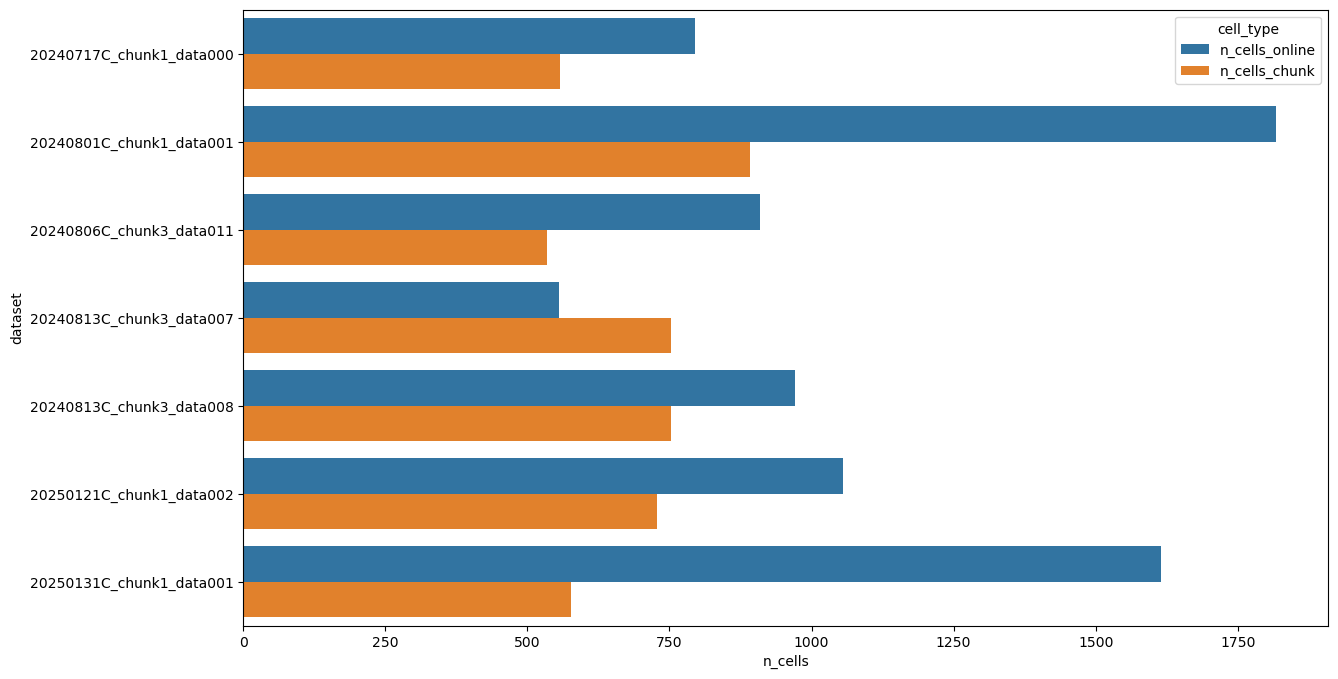

In [66]:
import seaborn as sns

import matplotlib.pyplot as plt

# Melt the dataframe to have 'n_cells_online' and 'n_cells_chunk' in a single column
df_melted = df.melt(id_vars=['dataset'], value_vars=['n_cells_online', 'n_cells_chunk'], 
                    var_name='cell_type', value_name='n_cells')

# Create the grouped barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, y='dataset', x='n_cells', hue='cell_type')